In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Преподготовка

In [10]:
df1 = pd.read_csv('data\S07-hw-dataset-01.csv')
print(df1.info())
print(df1.describe())
print(f"Процент пропусков \n{df1.isna().mean()}")
print(df1.dtypes)
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
None
         sample_id           f01           f02           f03           f04  \
count  12000.00000  12000.000000  12000.000000  12000.000000  12000.000000   
mean    5999.50000     -2.424716     19.107804     -0.222063     -8.284501   
std     3464.24595     11.014315     60.790338      0.500630     59.269838   
min        0.00000    -19.912573    -92.892652     -1.590979   -134.303679   
25%  

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [11]:
df2 = pd.read_csv('data\S07-hw-dataset-02.csv')
print(df2.info())
print(df2.describe())
print(f"Процент пропусков \n{df1.isna().mean()}")
print(df2.dtypes)
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None
        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.110454
std    2309.54541     0.955138     0.663195     8.097716
min       0.00000    -2.487352    -2.499237   -34.056074
25%    1999.75000    -0.116516    -0.242357    -5.392210
50%    3999.50000     0.490658     0.241092     0.132470
75%    5999.25000     1.085263     0.726526     5.655605
max    7999.00000     2.987555     2.995553    29.460076
Процент пропусков 
sample_id    0.0
f01          0.0
f02          0.0
f03          0

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [12]:
df3 = pd.read_csv('data\S07-hw-dataset-03.csv')
print(df3.info())
print(df3.describe())
print(f"Процент пропусков \n{df1.isna().mean()}")
print(df3.dtypes)
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None
          sample_id            x1            x2        f_corr       f_noise
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000
mean    7499.500000      1.246296      1.033764      0.212776     -0.027067
std     4330.271354      4.592421      4.710791      1.530017      2.506375
min        0.000000     -9.995585     -9.980853     -5.212038     -8.785884
25%     3749.750000     -1.782144     -2.666393     -0.966224     -1.731128
50%     7499.500000      0.664226      1.831257      0.296508     -0.052391
75%    11249.250000    

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
def preprocess(df):
    preprocessing_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    df_processed_array = preprocessing_pipeline.fit_transform(df)
    
    df_processed = pd.DataFrame(
        df_processed_array, 
        columns=df.columns,  # ← сохраняем названия
        index=df.index         # ← сохраняем индексы если нужно
    )
    return df_processed

df1_processed = preprocess(df1)

df2_processed = preprocess(df2)

df3_processed = preprocess(df3)

In [35]:

def kmeans_clustering(df, n_clusters=3, random_state=42):
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=random_state,
        n_init=10
    )
    kmeans.fit(df)
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = kmeans.labels_
    
    return df_with_clusters

df1_with_clusters = kmeans_clustering(df1_processed, n_clusters=3)

print(df1_with_clusters)

       sample_id       f01       f02       f03       f04       f05       f06  \
0      -1.731906  0.171427 -1.462805  0.438279  1.350282 -1.594870 -0.895915   
1      -1.731618  1.603021  0.553062 -2.100584 -1.617058  1.676647  2.254548   
2      -1.731329  1.903730  0.957583 -2.196569 -1.749059  1.486600  1.685130   
3      -1.731040 -0.918315 -1.000485  0.736178  0.415180  0.225138  0.071065   
4      -1.730752 -0.406610  0.702865  0.398708 -0.579524  0.469372 -0.434905   
...          ...       ...       ...       ...       ...       ...       ...   
11995   1.730752  1.614616  0.622927 -1.732997 -1.478170  1.295172  1.700694   
11996   1.731040 -0.304809  0.856922  0.040553 -0.777021  0.725046 -0.287324   
11997   1.731329 -0.467465  0.837505  0.124236  0.429444 -0.515115 -0.427149   
11998   1.731618  1.478284  1.138939 -2.412913 -1.579645  1.558562  1.916029   
11999   1.731906 -1.165714 -0.849189  0.873457  0.474297  0.208219  0.099373   

            f07       f08  cluster  
0 

In [40]:
def eval_dbscan_grid(X_feat, eps_list, min_samples_list):
    results = []
    n = len(X_feat)

    for eps in eps_list:
        for ms in min_samples_list:
            model = DBSCAN(eps=eps, min_samples=ms)
            labels = model.fit_predict(X_feat)

            noise_frac = float(np.mean(labels == -1))
            # Метрики по non-noise
            mask = labels != -1
            labels_nn = labels[mask]
            X_nn = X_feat[mask]

            # Перенумеруем метки non-noise, чтобы метрики работали корректнее (не обязательно, но аккуратно)
            if len(labels_nn) > 0:
                uniq = np.unique(labels_nn)
                mapping = {u: i for i, u in enumerate(uniq)}
                labels_nn = np.array([mapping[v] for v in labels_nn], dtype=int)

            metrics = None
            n_clusters = 0
            if len(X_nn) >= 10 and len(np.unique(labels_nn)) >= 2:
                metrics = safe_cluster_metrics(X_nn, labels_nn)
                n_clusters = len(np.unique(labels_nn))

            results.append({
                "algo": "dbscan",
                "params": {"eps": float(eps), "min_samples": int(ms)},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": int(n_clusters),
                "noise_frac": float(noise_frac),
                "n_non_noise": int(mask.sum()),
            })
    return results

dbscan_results = eval_dbscan_grid(X_feat, dbscan_eps, dbscan_min_samples)
len(dbscan_results)

15

In [41]:
valid = [r for r in dbscan_results if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid))

# Сортировка по silhouette
valid_sorted = sorted(valid, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])

     

Valid DBSCAN configs: 12
{'eps': 2.0, 'min_samples': 5} sil= 0.717 noise= 0.973 clusters= 3
{'eps': 2.5, 'min_samples': 10} sil= 0.47 noise= 0.933 clusters= 4
{'eps': 2.5, 'min_samples': 5} sil= 0.406 noise= 0.838 clusters= 13
{'eps': 3.0, 'min_samples': 10} sil= 0.399 noise= 0.757 clusters= 9
{'eps': 2.0, 'min_samples': 3} sil= 0.341 noise= 0.93 clusters= 22
{'eps': 1.5, 'min_samples': 3} sil= 0.337 noise= 0.989 clusters= 2
{'eps': 3.0, 'min_samples': 5} sil= 0.276 noise= 0.571 clusters= 27
{'eps': 3.5, 'min_samples': 10} sil= 0.266 noise= 0.459 clusters= 11


In [39]:

def eval_agglomerative_grid(X_feat, ks, linkages):
    results = []
    for linkage_name in linkages:
        for k in ks:
            try:
                model = AgglomerativeClustering(n_clusters=k, linkage=linkage_name)
                labels = model.fit_predict(X_feat)
            except Exception:
                continue

            metrics = safe_cluster_metrics(X_feat, labels)

            results.append({
                "algo": "agglomerative",
                "params": {"k": int(k), "linkage": linkage_name},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": len(np.unique(labels)),
                "noise_frac": 0.0,
            })
    return results

agg_results = eval_agglomerative_grid(X_feat, agg_ks, agg_linkages)
len(agg_results), agg_results[0]["params"]

(57, {'k': 2, 'linkage': 'ward'})

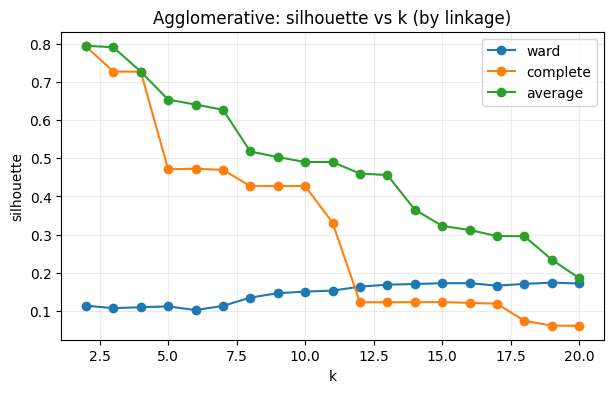

In [42]:
plt.figure(figsize=(7, 4))

for linkage_name in agg_linkages:
    subset = [r for r in agg_results if r["params"]["linkage"] == linkage_name]
    subset = sorted(subset, key=lambda r: r["params"]["k"])
    ks = [r["params"]["k"] for r in subset]
    sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in subset]
    plt.plot(ks, sil, marker="o", label=linkage_name)

plt.title("Agglomerative: silhouette vs k (by linkage)")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)
plt.legend()
plt.show()

In [43]:
best_agg, best_agg_s = pick_best_by_silhouette(agg_results)
best_agg["params"], round(best_agg_s, 3)

({'k': 2, 'linkage': 'average'}, 0.796)

In [45]:
def print_result_card(name, result):
    m = result["metrics"] or {}
    print("=" * 72)
    print(f"{name}")
    print("algo:", result["algo"])
    print("params:", result["params"])
    print("n_clusters:", result.get("n_clusters"))
    if result["algo"] == "dbscan":
        print("noise_frac:", round(result.get("noise_frac", 0.0), 3), " non-noise:", result.get("n_non_noise"))
    print("metrics:")
    print("  silhouette:", None if m.get("silhouette") is None else round(m["silhouette"], 3))
    print("  davies_bouldin:", None if m.get("davies_bouldin") is None else round(m["davies_bouldin"], 3))
    print("  calinski_harabasz:", None if m.get("calinski_harabasz") is None else round(m["calinski_harabasz"], 1))
    if result.get("inertia") is not None:
        print("  inertia:", round(result["inertia"], 1))

print_result_card("BEST KMEANS (by silhouette)", best_kmeans)
# if best_dbscan is not None:
#     print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan)
# print_result_card("BEST AGGLOMERATIVE (by silhouette)", best_agg)


BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 2}
n_clusters: 2
metrics:
  silhouette: 0.397
  davies_bouldin: 1.443
  calinski_harabasz: 90.5
  inertia: 93209.2


## Настройки

In [19]:
# Настройки PCA: None (не использовать) или число компонент (например, 30)
pca_dim = 30

# Диапазон K для KMeans
kmeans_ks = list(range(2, 21))

# Сетка для DBSCAN: eps и min_samples
# eps зависит от масштаба данных – после scaling обычно eps ~ 0.5..5 (но это очень примерно).
dbscan_eps = [1.5, 2.0, 2.5, 3.0, 3.5]
dbscan_min_samples = [3, 5, 10]

# Agglomerative: число кластеров и linkage (для sklearn Agglomerative: 'ward' требует euclidean)
agg_ks = list(range(2, 21))
agg_linkages = ["ward", "complete", "average"]

print("Config:")
print(" pca_dim:", pca_dim)
print(" kmeans_ks:", (kmeans_ks[0], "...", kmeans_ks[-1]))
print(" dbscan eps:", dbscan_eps)
print(" dbscan min_samples:", dbscan_min_samples)
print(" agg ks:", (agg_ks[0], "...", agg_ks[-1]))
print(" agg linkages:", agg_linkages)

Config:
 pca_dim: 30
 kmeans_ks: (2, '...', 20)
 dbscan eps: [1.5, 2.0, 2.5, 3.0, 3.5]
 dbscan min_samples: [3, 5, 10]
 agg ks: (2, '...', 20)
 agg linkages: ['ward', 'complete', 'average']


In [25]:
def safe_cluster_metrics(X, labels):
    """Считает метрики; возвращает None, если метрика неприменима."""
    unique = np.unique(labels)
    # Нужно минимум 2 кластера
    if len(unique) < 2:
        return None

    # Нельзя, чтобы все точки были в одном кластере
    if len(unique) == 1:
        return None

    # silhouette требует, чтобы все кластеры имели >1 точки (часто, но не всегда)
    # В sklearn silhouette_score может падать, если какой-то кластер пуст/особый.
    try:
        sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None

    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None

    try:
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None

    return {"silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch}

def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    """PCA(2D) именно для визуализации."""
    p = PCA(n_components=2, random_state=random_state)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title):
    plt.figure(figsize=(7, 5))
    plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.show()

def summarize_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist()))

# Kmeans

In [26]:
def eval_kmeans_grid(X_feat, ks):
    results = []
    for k in ks:
        try:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
        except TypeError:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)

        labels = model.fit_predict(X_feat)
        metrics = safe_cluster_metrics(X_feat, labels)

        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": labels,
            "metrics": metrics,
            "inertia": float(model.inertia_),
            "n_clusters": len(np.unique(labels)),
            "noise_frac": 0.0,
        })
    return results

kmeans_results = eval_kmeans_grid(X_feat, kmeans_ks)
len(kmeans_results), kmeans_results[0]["params"], kmeans_results[-1]["params"]

(19, {'k': 2}, {'k': 20})

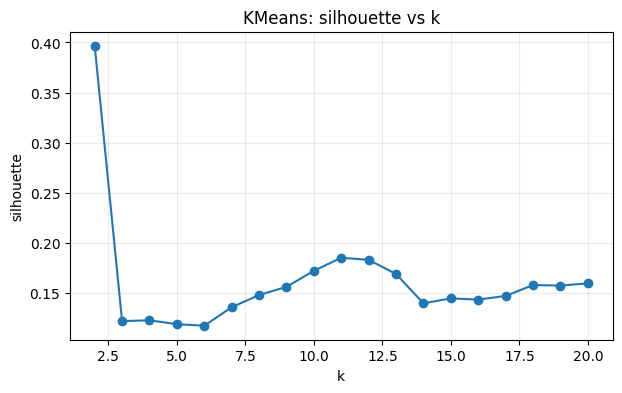

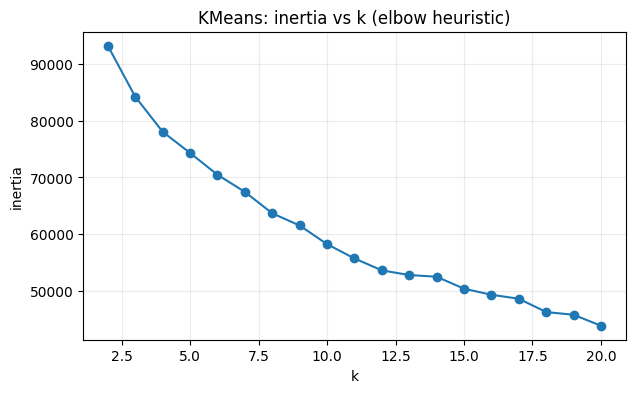

In [27]:
ks = [r["params"]["k"] for r in kmeans_results]
sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results]

plt.figure(figsize=(7, 4))
plt.plot(ks, sil, marker="o")
plt.title("KMeans: silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)
plt.show()

# Инерция (elbow) – как эвристика
inertia = [r["inertia"] for r in kmeans_results]
plt.figure(figsize=(7, 4))
plt.plot(ks, inertia, marker="o")
plt.title("KMeans: inertia vs k (elbow heuristic)")
plt.xlabel("k")
plt.ylabel("inertia")
plt.grid(True, alpha=0.25)
plt.show()

In [28]:

def pick_best_by_silhouette(results):
    best = None
    best_score = -np.inf
    for r in results:
        m = r["metrics"]
        if m is None:
            continue
        s = m["silhouette"]
        if s is None:
            continue
        if s > best_score:
            best_score = s
            best = r
    return best, best_score

best_kmeans, best_kmeans_s = pick_best_by_silhouette(kmeans_results)
best_kmeans["params"], round(best_kmeans_s, 3)

({'k': 2}, 0.397)